# 텐서플로 임포트

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# 선형 회귀 모델

In [2]:
import pandas as pd
import numpy as np

x = [-3,  31,  -11,  4,  0,  22, -2, -5, -25, -14]
y = [ -2,   32,   -10,   5,  1,   23,  -1,  -4, -24,  -13]

X_train = np.array(x).reshape(-1, 1)
y_train = np.array(y)

print(X_train.shape, y_train.shape)

(10, 1) (10,)


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=1))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.1962603]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [6]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.1962603]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [7]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [8]:
model.fit(X_train, y_train, epochs=5000, verbose=0)

In [9]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.9999999]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.9999978], dtype=float32)>]

In [ ]:
test_x = np.array([11, 12, 13]).reshape(3, 1)
test_x

array([[11],
       [12],
       [13]])

In [ ]:
model.predict(test_x)

array([[11.999968],
       [12.999966],
       [13.999963]], dtype=float32)

# MNIST dataset

In [10]:
# MNIST DATA
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


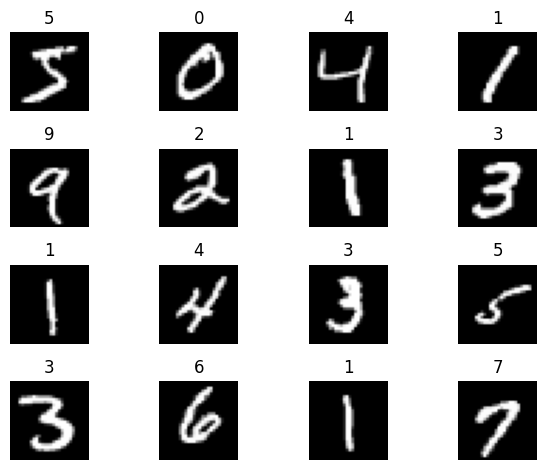

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4)
for i in range(16):
    ax = axes[i//4, i%4]
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))
plt.tight_layout()
plt.show()

# 전처리

In [12]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [ ]:
print(f'최소값: {x_train.min()}, 최대값: {x_train.max()}')

최소값: 0, 최대값: 255


In [15]:
# 데이터 정규화
x_train = x_train / x_train.max()

print(f'최소값: {x_train.min()}, 최대값: {x_train.max()}')

최소값: 0.0, 최대값: 1.0


In [13]:
# test 셋 정규화
x_test = x_test / 255.

In [16]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [17]:
x_train = x_train.reshape(60000, -1)
print(x_train.shape)

(60000, 784)


In [18]:
x_test = x_test.reshape(10000, -1)
print(x_test.shape)

(10000, 784)


# Sequential API

In [19]:
# List 입력
model = Sequential([
    Dense(64,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

# add 함수
model = Sequential()
model.add(Dense(64,activation = 'relu', input_shape=(784,)))
model.add(Dense(10,activation = 'softmax'))

# 입력 레이어

In [ ]:
model = Sequential([
    Dense(64,activation = 'relu', input_shape=(784,)),
    Dense(10,activation = 'softmax')
])

# 활성화 함수

In [20]:
# Dense 레이어에 relu 활성화 함수를 적용
tf.keras.layers.Dense(128, activation='relu')

In [21]:
# Activation 레이어에 relu 활성화 함수를 적용
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

# 출력 레이어

In [ ]:
# 회귀 분석: 출력층 노드 = 1인 경우
tf.keras.layers.Dense(1, activation='linear')

# 분류 분석: 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 분류 분석: 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

# 손실함수

출력 노드가 1개, sigmoid 활성화 함수를 적용한 경우

In [ ]:
# 회귀 분석
model.compile(loss='mse')

In [ ]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [ ]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

# 옵티마이저

In [ ]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001))

# 문자열로 지정
model.compile(optimizer='adam')

# 평가지표

In [ ]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 훈련

In [ ]:
# 훈련
model.fit(x_train, y_train,
        #   validation_split = .2,
          validation_data=(x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3022 - accuracy: 0.9161 - val_loss: 0.1660 - val_accuracy: 0.9518
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1444 - accuracy: 0.9583 - val_loss: 0.1279 - val_accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1045 - accuracy: 0.9692 - val_loss: 0.1091 - val_accuracy: 0.9664
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0824 - accuracy: 0.9754 - val_loss: 0.0907 - val_accuracy: 0.9720
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0676 - accuracy: 0.9795 - val_loss: 0.0919 - val_accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0562 - accuracy: 0.9826 - val_loss: 0.0890 - val_accuracy: 0.9731
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0821 - val_accuracy:

# 평가

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0846 - accuracy: 0.9760
0.9760000109672546


# 추론

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0]

array([1.2753225e-11, 5.8310588e-13, 7.4590980e-07, 2.4410793e-04,
       8.2345006e-14, 6.4528223e-08, 3.3123348e-15, 9.9975449e-01,
       4.8104846e-07, 7.5740289e-08], dtype=float32)

In [ ]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]
